# Problem Formulation

The problem is a supervised multi-class (multinomial) text classification problem. The aim of the project is to investigate which supervised machine learning methods are the most suitable to solve the problem.

Given a dark pattern to the model, it should be assigned to one of the 7 pattern categories in the list. The classifier makes the assumption that each Pattern String is assigned to one and only one category. 

----

In [4]:
import pandas as pd
import numpy as np

# to encode text, aka tokenize documents, to learn the vocabulary and inverse document frequency weightings.
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

# provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.
from sklearn.feature_extraction.text import CountVectorizer

# systematically compute word counts using CountVectorizer and them compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.
from sklearn.feature_extraction.text import TfidfTransformer

# MultinomialNB (multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts, however, in practice, fractional counts such as tf-idf may also work.
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn import metrics

# joblib is a set of tools to provide lightweight pipelining in Python. It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently.
import joblib


## Data Exploration

----
`Import the Princeton dataset (which contains various dark pattern categories) and explore the dataset.`


In [5]:
# ---- import dataset from the Princeton Article
df = pd.read_csv('dark_patterns.csv')

In [6]:
df.head()

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/


----
`Check the information of the original dataset,including number of the rows and columns, names of the columns, and missing values`

There are 1512 instances of Not Null pattern strings of dark patterns in the dataset, which will be features of our models.

All the pattern category are Not Null, which will be targets of our models.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1512 non-null   object
 1   Comment            1798 non-null   object
 2   Pattern Category   1818 non-null   object
 3   Pattern Type       1818 non-null   object
 4   Where in website?  1818 non-null   object
 5   Deceptive?         1818 non-null   object
 6   Website Page       1818 non-null   object
dtypes: object(7)
memory usage: 99.5+ KB


## Dataset Preparation
----
`Prepare the features and target columns for later machine learning.`

`The feature column is the "Pattern String", select rows when the feature is NOT Null`

In [8]:
# ---- select from the dataset when 'Pattern String' is not NaN values.
df = df[pd.notnull(df["Pattern String"])]

In [9]:
df.head()

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1512 non-null   object
 1   Comment            1494 non-null   object
 2   Pattern Category   1512 non-null   object
 3   Pattern Type       1512 non-null   object
 4   Where in website?  1512 non-null   object
 5   Deceptive?         1512 non-null   object
 6   Website Page       1512 non-null   object
dtypes: object(7)
memory usage: 94.5+ KB


----
`"Pattern String" column is the feature column, which is the sentences indicating the dark patterns;`

`"Pattern Category" column is the target column, which is the 7 category names of the dark pattern listed in the Princeton dataset.`

In [11]:
# ---- select only "Pattern String" and "Pattern Category" 2 columns to be the sub-dataset.
col = ["Pattern String", "Pattern Category"]
df = df[col]

In [12]:
df.head()

,Pattern String,Pattern Category
0,Collin P. from Grandview Missouri just bought ...,Social Proof
1,"Faith in Glendale, United States purchased a C...",Social Proof
2,Sharmeen Atif From Karachi just bought Stylish...,Social Proof
3,9 people are viewing this.,Social Proof
4,5338 people viewed this in the last hour,Social Proof


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1817
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pattern String    1512 non-null   object
 1   Pattern Category  1512 non-null   object
dtypes: object(2)
memory usage: 35.4+ KB


----
`Check the distribution of pattern category`

In [14]:
df['Pattern Category'].value_counts()

Scarcity         678
Social Proof     314
Urgency          237
Misdirection     237
Obstruction       30
Sneaking          12
Forced Action      4
Name: Pattern Category, dtype: int64

`Visualisation of the pattern category distribution`

<AxesSubplot:>

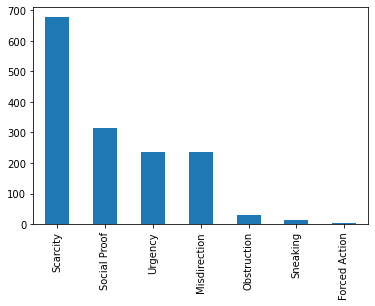

In [15]:
df['Pattern Category'].value_counts().plot.bar()

---
### `Investigate the terms that are the most related with each of the 'Pattern Category'`

In [16]:
# ---- encode the pattern category type into integers (7 types in total, encoded into integers from 0-6).

df["category_id"] = df['Pattern Category'].factorize()[0]

In [17]:
# ---- Get the mapping of the encoding integers and the pattern categories.
# ---- {'Social Proof': 0, 'Misdirection': 1, 'Urgency': 2, 'Forced Action': 3, 'Obstruction': 4, 'Sneaking': 5, 'Scarcity': 6}

category_id_df = df[['Pattern Category', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(
    category_id_df[['category_id', 'Pattern Category']].values)

In [18]:
# ---- result of the mapping 

category_to_id

{'Social Proof': 0,
 'Misdirection': 1,
 'Urgency': 2,
 'Forced Action': 3,
 'Obstruction': 4,
 'Sneaking': 5,
 'Scarcity': 6}

In [19]:
# ---- convert a collection of raw documents to a matrix of TF-IDF features; Equivalent to CountVectorizer followed by TfidfTransformer.
# 'sublinear_tf=True' is used to normalise bias of term frequency ("where a term that is more frequent shouldn't be X times as important"). It is set to True to use a logarithmic form for frequency.
# 'norm='l2'' is the default setting of 'norm', used to reduce document length bias, to ensure all our feature vectors have a enclidian norm of 1.
# 'min_df=5', means when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold (which is 5 here), which is the minimum numbers of documents a word must be present in to be kept.
# 'ngram_range=(1,2)' means unigrams and bigrams will be extracted, means we want to consider both unigrams and bigrams.
# 'stop_words='english'', if a string, it is passed to _check_stop_list and the appropriate stop list is returned. To remove all common pronouns ("a", "the" ...), reducing the number of noisy features.

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df['Pattern String']).toarray()
labels = df.category_id

features.shape

# The result means each of the 1512 pattern strings is represented by 303 features, representing the tf-idf score for different unigrams and bigrams.

(1512, 303)

---
Here we use `sklearn.feature_selection.chi2` to find the terms that are the most correlated with each of the pattern strings.

In [20]:
N = 3   # every n-gram will give 3 examples 

for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("Pattern Category Type: '{}':".format(Category))
  print("  . Most correlated unigrams:\n     . {}".format('\n     . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n     . {}".format('\n     . '.join(bigrams[-N:])))

Pattern Category Type: 'Forced Action':
  . Most correlated unigrams:
     . receive
     . terms
     . agree
  . Most correlated bigrams:
     . hurry left
     . limited time
     . left stock
Pattern Category Type: 'Misdirection':
  . Most correlated unigrams:
     . pay
     . don
     . thanks
  . Most correlated bigrams:
     . don feel
     . pay price
     . thanks don
Pattern Category Type: 'Obstruction':
  . Most correlated unigrams:
     . com
     . membership
     . cancel
  . Most correlated bigrams:
     . time calling
     . customer service
     . membership time
Pattern Category Type: 'Scarcity':
  . Most correlated unigrams:
     . hurry
     . stock
     . left
  . Most correlated bigrams:
     . items left
     . hurry left
     . left stock
Pattern Category Type: 'Sneaking':
  . Most correlated unigrams:
     . account
     . year
     . charge
  . Most correlated bigrams:
     . left stock
     . like free
     . free shipping
Pattern Category Type: 'Social Proo

----
### `Split the dataset into training and testing subset`

The training dataset occupies 60% of the dataset.

In [21]:
String_train, String_test, Category_train, Category_test = train_test_split(
    df['Pattern String'], df['Pattern Category'], train_size=.6)

----
### `Encode the Target values into integers`

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Category_train)
y_train = encoder.transform(Category_train)
y_test = encoder.transform(Category_test)

In [23]:
# check the mapping of encoding results (from 0 to 6 representing 'Forced Action', 'Misdirection'......)

list(encoder.classes_)

['Forced Action',
 'Misdirection',
 'Obstruction',
 'Scarcity',
 'Sneaking',
 'Social Proof',
 'Urgency']

In [24]:
# Check the frequency distribution of the training pattern category with pattern category names.

(unique, counts) = np.unique(Category_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Forced Action' 3]
 ['Misdirection' 137]
 ['Obstruction' 22]
 ['Scarcity' 401]
 ['Sneaking' 8]
 ['Social Proof' 198]
 ['Urgency' 138]]


In [25]:
# Check the frequency distribution of the encoded training pattern category with encoded integers.

(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0   3]
 [  1 137]
 [  2  22]
 [  3 401]
 [  4   8]
 [  5 198]
 [  6 138]]


In [26]:
# Check the frequency distribution of the encoded testing pattern category with encoded integers.

(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0   1]
 [  1 100]
 [  2   8]
 [  3 277]
 [  4   4]
 [  5 116]
 [  6  99]]


---
### `Encode the Textual Features into series of vector of numbers `

In [27]:
# First get the word count vector of the pattern string to encode the pattern string.

cv = CountVectorizer()
String_train_counts = cv.fit_transform(String_train)

# Then use the tf-idf score to transform the encoded word count pattern string vectors.

tfidf_tf = TfidfTransformer()
X_train = tfidf_tf.fit_transform(String_train_counts)

In [45]:
# save the CountVectorizer to disk

joblib.dump(cv, 'category_CountVectorizer.joblib')

['category_CountVectorizer.joblib']

---
# Rough Idea about the effect of different classifiers

---
First we use all the default settings of the classifiers without hyperparameter tunning, to have a rough idea of the predictive ability of different classifiers.

Then we will choose typical classifiers to do hyperparameter tuning according to the result here.

In [51]:
# Five models are tested:
# -- Logistic Regression
# -- Linear Support Vector Machine
# -- Random Forest
# -- Decision Tree
# -- Multinomial Naive Bayes

classifiers = [LogisticRegression(),LinearSVC(), RandomForestClassifier(), DecisionTreeClassifier(), MultinomialNB()]

In [60]:
# Calculate the accuracies of different classifiers using default settings.

acc = []
# cm = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(cv.transform(String_test))
    acc.append(metrics.accuracy_score(y_test, y_pred))
    cm.append(metrics.confusion_matrix(y_test, y_pred))

In [61]:
# List the accuracies of different classifiers.

for i in range(len(classifiers)):
    print(f"{classifiers[i]} accuracy: {acc[i]}")
    # print(f"Confusion Matris: {cm[i]}")

LogisticRegression() accuracy: 0.9504132231404959
LinearSVC() accuracy: 0.9553719008264463
RandomForestClassifier() accuracy: 0.947107438016529
DecisionTreeClassifier() accuracy: 0.8694214876033057
MultinomialNB() accuracy: 0.947107438016529


---
# Multinomial Naive Bayes Classifier

`Naive Bayes Classifier is one of the most suitable algorithms for word counts when dealing with multinomial variants.`

---
### `Use default setting of classifier parameters`

In [28]:
clf_mnb = MultinomialNB().fit(X_train, y_train)

In [29]:
clf_mnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [30]:
y_pred = clf_mnb.predict(cv.transform(String_test))

---
`Use the default setting of the parameters of MultinomialNB classifier, the accuracy can reach 0.947.`

In [31]:
print("Accuracy:", metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.947107438016529


---
`The classifier is unable to classify the "0" ("Forced Action") and the "4" ("Sneaking") pattern type in the Princeton testing dataset.`

In [32]:
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  1,  87],
       [  2,   9],
       [  3, 290],
       [  5, 120],
       [  6,  99]])

---
### `Parameter Tunning of MultinomialNB Classifier`

`Define the combination of parameters to be considered`

In [33]:
param_grid = {'alpha':[0,1], 
              'fit_prior':[True, False]}

`Run the Grid Search`

Use cross validation on the training dataset to find optimal model.

In [35]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_mnb,param_grid,cv=5, 
                      verbose = 1, n_jobs = -1)

In [37]:
best_mnb = gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.8s finished


In [38]:
scores_df = pd.DataFrame(best_mnb.cv_results_)
scores_df = scores_df.sort_values(by=['rank_test_score']).reset_index(drop='index')
scores_df [['rank_test_score', 'mean_test_score', 'param_alpha', 'param_fit_prior']]

,rank_test_score,mean_test_score,param_alpha,param_fit_prior
0,1,0.941528,1,False
1,2,0.913964,0,True
2,3,0.900747,0,False
3,4,0.890851,1,True


In [39]:
best_mnb.best_params_

{'alpha': 1, 'fit_prior': False}

In [40]:
y_pred_best = best_mnb.predict(cv.transform(String_test))

In [41]:
print("Accuracy:", metrics.accuracy_score(y_pred_best, y_test))

Accuracy: 0.9586776859504132


In [42]:
(unique, counts) = np.unique(y_pred_best, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  0,   2],
       [  1,  88],
       [  2,  12],
       [  3, 282],
       [  4,   2],
       [  5, 117],
       [  6, 102]])

---
`Save the best MultinomialNB model for future reuse`

In [44]:
# save the model to local disk

joblib.dump(best_mnb, 'mnb_category_classifier.joblib')

['mnb_category_classifier.joblib']

---
# Linear Support Vector Machine

This class supports both dense and sparse input and the multi-class problem is handled according to a one-vs-the-rest scheme.

----
### `Use default setting of hyperparameters of the classifier.`

In [62]:
clf_svm = LinearSVC().fit(X_train, y_train)

In [63]:
clf_svm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [64]:
y_pred = clf_svm.predict(cv.transform(String_test))

In [65]:
print("Accuracy:", metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.9553719008264463


In [66]:
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  0,   1],
       [  1,  87],
       [  2,  12],
       [  3, 277],
       [  4,   3],
       [  5, 118],
       [  6, 107]])

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[  1,   0,   0,   0,   0,   0,   0],
       [  0,  86,   2,   1,   2,   1,   8],
       [  0,   0,   8,   0,   0,   0,   0],
       [  0,   0,   0, 273,   0,   0,   4],
       [  0,   1,   2,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0, 115,   1],
       [  0,   0,   0,   3,   0,   2,  94]])

In [69]:
param_grid = {'penalty':['l1','l2'], 
              'C':[0.1, 1, 5, 10]}

In [70]:
gs = GridSearchCV(clf_svm,param_grid,cv=5, 
                      verbose = 1, n_jobs = -1)

In [71]:
best_svm = gs.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.1s finished


In [72]:
scores_df = pd.DataFrame(best_svm.cv_results_)
scores_df = scores_df.sort_values(by=['rank_test_score']).reset_index(drop='index')
scores_df [['rank_test_score', 'mean_test_score', 'param_penalty', 'param_C']]

,rank_test_score,mean_test_score,param_penalty,param_C
0,1,0.951454,l2,5
1,1,0.951454,l2,10
2,3,0.950355,l2,1
3,4,0.933811,l2,0.1
4,5,NaN,l1,0.1
5,6,NaN,l1,1
6,7,NaN,l1,5
7,8,NaN,l1,10


In [73]:
best_svm.best_params_ 

{'C': 5, 'penalty': 'l2'}

In [74]:
y_pred_best = best_svm.predict(cv.transform(String_test))

In [75]:
print("Accuracy:", metrics.accuracy_score(y_pred_best, y_test))

Accuracy: 0.9520661157024793


In [76]:
(unique, counts) = np.unique(y_pred_best, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  0,   1],
       [  1,  87],
       [  2,  12],
       [  3, 276],
       [  4,   5],
       [  5, 117],
       [  6, 107]])

In [77]:
cm = metrics.confusion_matrix(y_test, y_pred_best)
cm

array([[  1,   0,   0,   0,   0,   0,   0],
       [  0,  86,   2,   1,   4,   1,   6],
       [  0,   0,   8,   0,   0,   0,   0],
       [  0,   0,   0, 272,   0,   0,   5],
       [  0,   1,   2,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0, 114,   2],
       [  0,   0,   0,   3,   0,   2,  94]])

---
`Save the best MultinomialNB model for future reuse`

In [78]:
# save the model to local disk

joblib.dump(best_svm, 'svm_category_classifier.joblib')

['svm_category_classifier.joblib']